In [1]:
#TO remove :
import os
directory = os.getcwd()
print(directory)

C:\Users\s1114237\OneDrive - Syngenta\Formations\Training\EPFL extension school\Machine_Learning_EPFL-extension-school\Course#2 Data Analysis


In [2]:
os.chdir("Machine_Learning_EPFL-extension-school\Course#2 Data Analysis")
directory = os.getcwd()
print(directory)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Machine_Learning_EPFL-extension-school\\Course#2 Data Analysis'

# Working with text Data
## Pandas string functions

Textual data can often be messy and difficult to work with since it is usually not in a standardized format ready for analysis. In order to understand how to work with textual data, we must begin by understanding how to work with strings in pandas. String functions in pandas are similar to built-in string functions from Python which we saw in the first course.

You might wonder, why we need to bother with string functions from pandas and not just use the Python standard ones? The reason is that Python’s string functions are for individual string objects, while the pandas functions are for Series and DataFrames. So you can think of the pandas string functions as an extension that allows us to operate on an entire Series or DataFrame of strings. As most of the time, the text data that we will be working with will already be in the form of a Series or a DataFrame, so using the specific functions from pandas will make our life a lot easier.

So how exactly do we use pandas string functions?

''' For pandas Series the string functions are accessed using the str attribute.
They have the following general form: Series.str.<function/property>
with the function names matching the corresponding string functions in Python.
You can find a full list of available functions here.

Note: The str attribute is not defined for the pandas DataFrame, only for Series. We must apply any string function column-wise. ''' 

In [2]:
import pandas as pd
import numpy as np

In [3]:
s = pd.Series(
    [
        "0",
        "John Wood",
        "Colin Welsh",
        "my list",
        "02456",
        np.nan,
        "HELLO WORLD",
        "water%",
    ]
)
s

0              0
1      John Wood
2    Colin Welsh
3        my list
4          02456
5            NaN
6    HELLO WORLD
7         water%
dtype: object

Here, we defined a Series of different string objects. If you recall from the first course, the python function str.lower() takes as input a string object and converts it to lowercase. Similarly, the pandas function str.lower() takes as input a Series and converts all strings in this Series to lowercase. Let’s give it a try:

In [4]:
s.str.lower()

0              0
1      john wood
2    colin welsh
3        my list
4          02456
5            NaN
6    hello world
7         water%
dtype: object

The function str.upper() is the opposite of this:

In [5]:
s.str.upper()

0              0
1      JOHN WOOD
2    COLIN WELSH
3        MY LIST
4          02456
5            NaN
6    HELLO WORLD
7         WATER%
dtype: object

We can get the length of each string in the Series:

In [6]:
s.str.len()

0     1.0
1     9.0
2    11.0
3     7.0
4     5.0
5     NaN
6    11.0
7     6.0
dtype: float64

For data cleaning and manipulations, we will be especially interested in splitting, stripping and replacing strings. Let’s give these a try:

In [7]:
s.str.split(" ")

0               [0]
1      [John, Wood]
2    [Colin, Welsh]
3        [my, list]
4           [02456]
5               NaN
6    [HELLO, WORLD]
7          [water%]
dtype: object

The function str.split() splits each string in the Series on the character provided inside the quotation marks. In our case, we asked the string to be split on the space character. Note that the function returns a Series of lists, where each list contains the substrings that were obtained by splitting on the given character(s). So for example, since the first string '0' did not contain the space character, the list contains a single string which is this original string. On the other hand, the string 'John Wood' was split into two strings. A nice feature of the str.split() function is that we can choose to have the results returned to us in a DataFrame instead of a Series of lists. We do this by including the expand=True parameter as follows:

In [9]:
substrings = s.str.split(" ", expand=True)
substrings

,0,1
0,0,None
1,John,Wood
2,Colin,Welsh
3,my,list
4,02456,None
5,NaN,NaN
6,HELLO,WORLD
7,water%,None


Note that the number of columns is determined by the maximum size of the lists. In our case, we had lists of size one and two so the DataFrame has two columns. For strings that were not split pandas filled the second column of the DataFrame contains the entry 'None'. We can now easily access the substring by just indexing the DataFrame. For example

In [10]:
substrings[1]

0     None
1     Wood
2    Welsh
3     list
4     None
5      NaN
6    WORLD
7     None
Name: 1, dtype: object

Let’s now look at replacing a substring. The general syntax of the function is the following

In [12]:
s.str.replace("%", " percent ")

0                 0
1         John Wood
2       Colin Welsh
3           my list
4             02456
5               NaN
6       HELLO WORLD
7    water percent 
dtype: object

If instead we just want to remove a specific substring or character we can use the function str.replace() and choose to replace it with the empty string. For example

In [13]:
s.str.replace("%", "")

0              0
1      John Wood
2    Colin Welsh
3        my list
4          02456
5            NaN
6    HELLO WORLD
7          water
dtype: object

Another useful function for us will be to index a particular slice of each string. For example suppose we want to get the first two characters of every string. We can do this by using the index directly

In [14]:
s.str[0:2]

0      0
1     Jo
2     Co
3     my
4     02
5    NaN
6     HE
7     wa
dtype: object

In [15]:
s.str.slice(0, 2)

0      0
1     Jo
2     Co
3     my
4     02
5    NaN
6     HE
7     wa
dtype: object

We can even combine the action of slicing and replacing using the str.slice_replace() function. Here we must mention first the slice of the string that we want to be replaced and then what we want it replaced by. The general syntax looks like this :
***This command takes the substring at positions i to j-1 and replaces it with the string 'str'. Let’s give it a try***

In [18]:
#str.slice_replace(i,j,'str')
s.str.slice_replace(0, 2, "___")

0             ___
1      ___hn Wood
2    ___lin Welsh
3        ___ list
4          ___456
5             NaN
6    ___LLO WORLD
7         ___ter%
dtype: object

A common operation when working with text data is to test whether character strings contain a certain substring or pattern of characters. For instance, if we were only interested in posts about Andrew Wiggins, we’d need to match all posts that make mention of him and avoid matching posts that don’t mention him.

Another function that we want to draw your attention to is the str.contains(). When working with text data it is quite common to test whether a certain substring or pattern is present in the strings of our dataset. This can also be useful if we want to obtain all the entries of a dataset that contain some keyword. The str.contains() function returns a Series of True/False values that indicate whether each string contains the given keyword. We can then use this Series of booleans to index our original Series and obtain those entries which correspond to the True values.

Here is an example

In [20]:
flag = s.str.contains("0")
flag

0     True
1    False
2    False
3    False
4     True
5      NaN
6    False
7    False
dtype: object

Note that the NaN entry returned NaN. If we wanted to make sure that we get back a Series of only True and False values we could use the parameter na=False which replaces NaN with a False:

In [22]:
flag = s.str.contains("0", na=False)
flag

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
dtype: bool

Let’s now get back the entries which contain the character '0':

In [23]:
s[flag]

0        0
4    02456
dtype: object

This concludes our overview of string functions in pandas. For a full list the functions available for us and their descriptions you can consult the pandas documentation Working with text data.

## Example : cleaning up the movies dataset

Now that we have gotten an overview of the string functions available to us in pandas, it is time we put them to use with a real dataset. To do this we will use a dataset that you have seen before Kaggle TMDB 5000 Movie DataSet. You can download the csv file from the Resources tab and save it in your working directory.

Let’s load the data.

In [74]:
# Import libraries
import pandas as pd
import numpy as np

# Load the data
movies = pd.read_csv("Ressources/c2_tmdb_5000_movies.csv")

As we will focus on applying pandas string functions, let’s take a look at the first 5 rows of the first 3 text-based columns.

In [27]:
# Show top entries of the first 3 text-based columns
movies.select_dtypes("object").iloc[:5,:3]

,genres,homepage,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."


As you can see the data is quite messy. Let’s focus on the column genres, as the entries here look particularly difficult to work with. We start by defining a Series corresponding to this column.

In [29]:
genres = movies["genres"]
genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

We would like to replace this entry with just the names of the genres separated by a comma such as: 'Action, Adventure, Fantasy, Science Fiction' 

How can we go about this? Since each entry is a JSON string, we could use the json module.

In [30]:
import json

json_obj = json.loads(genres[0])  # Load json string
names = [
    x["name"] for x in json_obj
] 
names

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

We can join lists of words into a string using the join function.

```", ".join(names)```

We can easily apply this to the entire Series genres by wrapping everything into a lambda function:

In [31]:
genres.map(lambda s: ', '.join(x['name'] for x in json.loads(s)))

0       Action, Adventure, Fantasy, Science Fiction
1                        Adventure, Fantasy, Action
2                          Action, Adventure, Crime
3                    Action, Crime, Drama, Thriller
4                Action, Adventure, Science Fiction
                           ...                     
4798                        Action, Crime, Thriller
4799                                Comedy, Romance
4800               Comedy, Drama, Romance, TV Movie
4801                                               
4802                                    Documentary
Name: genres, Length: 4803, dtype: object

However, let’s see how we can use the text commands from the last unit to manually extract genres. Let’s start by striping the strings of the square brackets.

We put this inside a function because we will keep adding some other functions inside and then we can make a single call to execute them all. For now, let’s see where this version of the function gets us to.

In [32]:
def transform(s):
    s = s.str.strip("[]")
    return s

genres = transform(genres)
genres[0]

'{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}'

So this successfully removed the square brackets. Now we would like to get rid of the other additional characters. We can do this by calling several string replacement functions, one for each sequence of characters that we would like to remove. Let’s give this a try.

In [33]:
def transform(s):
    s = s.str.strip("[]")
    s = s.str.replace("{", "", regex=True)
    s = s.str.replace("}", "", regex=True)
    s = s.str.replace(",", "", regex=True)
    s = s.str.replace('"id":', "", regex=True)
    s = s.str.replace('"name":', "", regex=True)
    s = s.str.replace('"', "", regex=True)
    return s

genres = transform(genres)
genres[0]

' 28  Action  12  Adventure  14  Fantasy  878  Science Fiction'

This is now definitely closer to what we wanted. The last challenge is to get rid of the numbers inside the string. But how can we do this? One option would be to use the replace method to remove each digit separately. This is quite tedious but it gets the job done. Let’s give it a try by adding the following lines inside the definition of our function transform().

In [34]:
def transform(s):
    s = s.str.strip("[]")
    s = s.str.replace("{", "", regex=True)
    s = s.str.replace("}", "", regex=True)
    s = s.str.replace(",", "", regex=True)
    s = s.str.replace('"id":', "", regex=True)
    s = s.str.replace('"name":', "", regex=True)
    s = s.str.replace('"', "", regex=True)
    s = s.str.replace("0", "", regex=True)
    s = s.str.replace("1", "", regex=True)
    s = s.str.replace("2", "", regex=True)
    s = s.str.replace("3", "", regex=True)
    s = s.str.replace("4", "", regex=True)
    s = s.str.replace("5", "", regex=True)
    s = s.str.replace("6", "", regex=True)
    s = s.str.replace("7", "", regex=True)
    s = s.str.replace("8", "", regex=True)
    s = s.str.replace("9", "", regex=True)
    return s
genres = transform(genres)
genres[0]


'   Action    Adventure    Fantasy    Science Fiction'

``` In the following unit, we will learn about regular expressions which enable string matching with less code. For example, instead of removing every digit separately, we can use regular expressions to match all numbers with a single regular expression pattern. Below, we show two alternative approaches to remove digits using regular expressions.

1st alternative
s = s.str.replace(‘[0-9]+’,’’, regex=True)

2nd alternative
s = s.str.replace(‘\d+’,’’, regex=True)

Don’t worry if you don’t understand how regular expressions work, as this is the topic of the next unit! ```

Almost there! We would like to remove some of the additional white spaces and also make sure to include a comma to separate the entries. There are 3 white spaces in front of the first entry and 4 white spaces separating each of the remaining entries. So what we could do is first replace all blocks of 4 white spaces with a ', ' and then remove the remaining three white spaces at the front. Let’s add the following two cleaning steps in the transform() function.

``` Note that the order in which we are adding the functions inside our routine is important since the transformations on the strings are applied in sequential order. ```

In [36]:
def transform(s):
    s = s.str.strip("[]")
    s = s.str.replace("{", "", regex=True)
    s = s.str.replace("}", "", regex=True)
    s = s.str.replace(",", "", regex=True)
    s = s.str.replace('"id":', "", regex=True)
    s = s.str.replace('"name":', "", regex=True)
    s = s.str.replace('"', "", regex=True)
    s = s.str.replace("0", "", regex=True)
    s = s.str.replace("1", "", regex=True)
    s = s.str.replace("2", "", regex=True)
    s = s.str.replace("3", "", regex=True)
    s = s.str.replace("4", "", regex=True)
    s = s.str.replace("5", "", regex=True)
    s = s.str.replace("6", "", regex=True)
    s = s.str.replace("7", "", regex=True)
    s = s.str.replace("8", "", regex=True)
    s = s.str.replace("9", "", regex=True)
    s = s.str.replace("    ", ", ")
    s = s.str.replace("   ", "")
    return s
genres = transform(genres)
genres[0]

'Action, Adventure, Fantasy, Science Fiction'

Exactly what we wanted! To have these changes reflected in the original DataFrame we can use:

In [37]:
movies["genres"] = genres
movies.loc[:, ["title", "genres"]].head(10)

,title,genres
0,Avatar,"Action, Adventure, Fantasy, Science Fiction"
1,Pirates of the Caribbean: At World's End,"Adventure, Fantasy, Action"
2,Spectre,"Action, Adventure, Crime"
3,The Dark Knight Rises,"Action, Crime, Drama, Thriller"
4,John Carter,"Action, Adventure, Science Fiction"
5,Spider-Man 3,"Fantasy, Action, Adventure"
6,Tangled,"Animation, Family"
7,Avengers: Age of Ultron,"Action, Adventure, Science Fiction"
8,Harry Potter and the Half-Blood Prince,"Adventure, Fantasy, Family"
9,Batman v Superman: Dawn of Justice,"Action, Adventure, Fantasy"


## Exercise: further practice with the movies dataset

In this unit, you will continue the work with the movies dataset that we saw in the previous units. We saw how to clean up the text of the genres column. Your task is to apply similar transformations to the keywords column. Your task is the following


Task: Transform the entries of the column keywords so that they each contain the first 3 keywords separated by a comma.

For example the entry :

In [75]:
movies.keywords[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

should become : 'culture clash, future, space war'

In [77]:
movies.keywords = movies.keywords.map(lambda s: ', '.join([ x["name"] for x in json.loads(s)][:3]))
movies.keywords[0]


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## Regular expressions

In the previous units, you saw that we could get quite far with pandas string functions. Even so, repeatedly applying these functions requires a lot of time and energy. This is where regular expressions can be useful. The primary purpose of regular expressions is to save us from writing unnecessary or repetitive code. Also known as RE, regex, or regular patterns, they consist of a sequence of characters and special characters called metacharacters used to match a set of strings. They allow us to sort through and analyze text much easier and more efficiently. Regular expressions first came about in 1956 when Stephen Cole Kleene used them to describe certain models of the human nervous system. Later on, they were used in several text editors, and nowadays, they have far-reaching applications, including in the world of data science.

### Our first examples with metacharacters
In order to use regular expressions, we must be familiar with some of the basic patterns called metacharacters. Metacharacters allow us to match more complex things than just specific substrings. Let’s look at an example. Suppose we had the following Series of strings:

In [78]:
import pandas as pd
import numpy as np

s = pd.Series(
    [
        "0",
        "John Wood",
        "Colin Welsh",
        "my list",
        "02456",
        np.nan,
        "HELLO WORLD",
        "water%",
    ])
s

0              0
1      John Wood
2    Colin Welsh
3        my list
4          02456
5            NaN
6    HELLO WORLD
7         water%
dtype: object

Suppose we want to check whether each entry contains the string ‘John’. As we already saw, we can do this easily in pandas using the str.contains() function.

In [79]:
s.str.contains("John")

0    False
1     True
2    False
3    False
4    False
5      NaN
6    False
7    False
dtype: object

This will return a Series of boolean values. However, what if we wanted to check if an entry contains the string ‘John’ or ‘Colin’? How would we do this? Well, we could perform an operation between the two boolean arrays as follows:

In [80]:
s.str.contains("John") | s.str.contains("Colin")

0    False
1     True
2     True
3    False
4    False
5    False
6    False
7    False
dtype: bool

This would indeed get the job done, but there is an easier way to do this with the help of regular expressions. We can use the metacharacter |, which acts as the “or” operator. Let’s give this a try.

In [81]:
s.str.contains("John|Colin")

0    False
1     True
2     True
3    False
4    False
5      NaN
6    False
7    False
dtype: object

So here, we passed the regular expression directly to the str.contains() function. The nice thing about pandas is that most of the string functions accept regular expressions.

Let’s look at a second example.

The metacharacter ```.``` matches any character other than a new line. Can you guess the result of the following line:

In [83]:
s2 = pd.Series(["bar", "sugar", "cartoon", "argon"])
s2.str.contains(".ar")

0     True
1     True
2     True
3    False
dtype: bool

Here we are looking for substrings of the type xar, where x can be any character. So, as long as the substring ar is found and there is at least one other character in front of the a, the result will be True. Indeed this is what we get back.

### Matching sets of characters
Another very common metacharacter is the square brackets []. Inside the brackets, we can specify a set of characters to match. For example:

In [84]:
s2.str.contains("[bc]ar")

0     True
1    False
2     True
3    False
dtype: bool

will return True if a string contains either the substring bar or car.

We can also specify inside the square brackets what kind of characters we want to match as follows:

- [a-z] - match any lowercase letter
- [A-Z] - match any uppercase letter
- [0-9] - match any digit
- [a-zA-Z0-9] - match any letter or digit

For example, we can search for all strings containing a digit in the string s:

In [85]:
s[s.str.contains("[0-9]", na=False)]

0        0
4    02456
dtype: object

Adding the ^ symbol inside the square brackets matches any characters NOT in the set. So we have

- [^a-z] - match any character that is not a lowercase letter
- [^A-Z] - match any character that is not a uppercase letter
- [^0-9] - match any character that is not a digit
- [^a-zA-Z0-9] - match any character that is not a letter or digit

On top of this, we can use certain shorthand for specifying common sequences:

- \d - match any digit
- \D - match any non-digit
- \w - match any alphanumeric character (letter or digit) or an underscore (_)
- \W - match any character that is not alphanumeric or an underscore as described above
- \s - match whitespace (spaces, tabs, newlines, etc.)
- \S - match non-whitespace

Here is then another way to find all strings containing a digit.

In [86]:
s[s.str.contains("[\d]", na=False)]

0        0
4    02456
dtype: object

### Matching at the start and end of strings
We can also specify the location of the string where we want to match by using:

- ^ - match at the beginning of a string
- $ - searches for matches at the end of a string

We want to search for strings that start with the letter 'b' or 'c' in s2. Then we can say:

In [87]:
s2[s2.str.contains("^[bc]", na=False)]

0        bar
2    cartoon
dtype: object

Or we can search for strings that end in 'ar' by writing:

In [88]:
s2[s2.str.contains("ar$", na=False)]

0      bar
1    sugar
dtype: object

Matching preceding characters
Often we want to mention a certain character and then ask to match one or more copies of this character. We can do this using the following metacharacters:

- * - match zero or more copies of the preceding character
- ? - match zero or 1 copy of the preceding character
- + - match 1 or more copies of the preceding character

Or we can use curly braces to specify how many times we want to match the given character. We have the following choices:

- {m} - match the preceding element m times
- {m,} - match the preceding element m times or more
- {m,n} - match the preceding element between m and n times

Let’s look at one other example.

In [89]:
s3 = pd.Series(["forest", "o", "ff", "foo", "fof"])
s3.str.contains("f+o?f+")

0    False
1    False
2     True
3    False
4     True
dtype: bool

This will search for all strings that contain 1 or more f’s, then an optional o, and finally 1 or more f’s. We can see that the third and fifth strings satisfy this pattern, as shown in the output.

An important thing to know is that if a character has a special meaning, we can use a backslash \ in front of it to “escape” its special meaning. For example, if we want to match periods, we cannot just use . since this will match any character, as we mentioned before. We must use \. instead.

### Grouping
Groups are parts of regular expression patterns enclosed in parentheses (e.g. (abc)). We use them to combine smaller regular expressions into larger ones.

For example, when used with the str.extract() method, grouping allows extracting captured groups in separate columns in a dataframe. Let’s look at an example.

In [91]:
s4 = pd.Series(["Monday5km", "Wednesday10km", "Saturday25km"])
# Extract weekday names in a new column
s4.str.extract("(\w+day)", expand=True)

,0
0,Monday
1,Wednesday
2,Saturday


This returned a new dataframe where the captured groups were stored in a new column. Note that we must use groups every time we use the str.extract() function.

What is the difference between the regular expression \w+day and \wday?

In [94]:
s4.str.extract("(\wday)", expand=True)

,0
0,nday
1,sday
2,rday


In [96]:
s5=pd.Series(['daylight saving', 'Sunday', 'weekday', 'midday on Saturday'])
s5.str.extract('(\w+day)') # only the first match in each string is extracted.

,0
0,NaN
1,Sunday
2,weekday
3,midday


In [97]:
# Extract weekday names and distances in km in separate columns
s4.str.extract("(\w+day)(\d+km)", expand=True)

,0,1
0,Monday,5km
1,Wednesday,10km
2,Saturday,25km


In [98]:
# Define string sample
sample = 'Monday5km'
sample

'Monday5km'

We will use the match function from the re library to match groups in the string sample from above. The function groups returns the matched groups in a tuple.

In [99]:
# Import re library
import re

# Match groups according to regex pattern
m = re.match('(\w+day)(\d+km)', # regex pattern
             sample              # string sample
            )

# Show matched groups
m.groups()

('Monday', '5km')

In [100]:
# Show first matched group

m.groups()[0]

'Monday'

In [101]:
m.groups()[1]

'5km'

In the cell below, we return the first three characters of the first matched group.

In [102]:
m.groups()[0][:3]

'Mon'

Let’s practice grouping with a small exercise. We will start from the example where we matched weekday names '\w+day' in the s4 dataframe. Instead of the full weekday names, we would like to return the abbreviated names: ‘Mon’, ‘Wed’, and ‘Sat’.

We first define a function that returns the first three characters in the first matched group, we pass it to thestr.replace() in place of the replacement string as follows:

In [103]:
def f(x):
    return x.groups()[0][:3]

s4.str.replace("(\w+day)",
               f,           
               regex=True
              )

0     Mon5km
1    Wed10km
2    Sat25km
dtype: object

#### Conclusion
This wraps up our introduction to regular expressions. Of course, this unit only scratches the surface since regular expressions are a vast topic, and entire books have been written about them. Combining the ideas that we covered here should give you enough flexibility for working with text data in pandas. Note that you will have to import the re library whenever you need to use regular expressions outside of pandas.

If you’d like to learn more about regular expressions, a good place to start are the following resources:

- [Python’s re package Documentation](https://docs.python.org/3/library/re.html)
- [Python’s official regular expression HOWTO](https://docs.python.org/3/howto/regex.html)

And these webpages allow you to build, test and debug your regular expressions with your own sample texts:

- [Regular expressions 101](https://regex101.com/), note you need to set the flavor to Python in the top left panel.
- [regexr](https://regexr.com/)
- [pythex](https://pythex.org/)

In the next unit, you will test your skills by working on a dataset using regular expressions.

## 06. Exercise: using regular expressions in pandas

In this unit, you will get to practice the regular expression you just learned. You will work with a dataset that contains information about a person’s meals over the last week. The data is stored in a single text file given below



In [105]:
meal_plan = [
    "Monday: 9:12am – Omelet,  3:30pm– Apple slices with almond butter",
    "Tuesday: 9:35am – Banana bread, 11:00am –Sauteed veggies, 7:02pm– Taco pie",
    "Wednesday: 9:00am – Banana pancakes",
    "Thursday: 7:23pm– Slow cooker pulled pork",
    "Friday: 3:30pm – Can of tuna",
    "Saturday: 9:11am: Eggs and sweet potato hash browns, 3:22pm: Almonds",
    "Sunday: 11:00am: Meat and veggie stir fry",
]

import pandas as pd

df = pd.DataFrame(meal_plan, columns=["text"])
df

,text
0,"Monday: 9:12am – Omelet, 3:30pm– Apple slices..."
1,"Tuesday: 9:35am – Banana bread, 11:00am –Saute..."
2,Wednesday: 9:00am – Banana pancakes
3,Thursday: 7:23pm– Slow cooker pulled pork
4,Friday: 3:30pm – Can of tuna
5,Saturday: 9:11am: Eggs and sweet potato hash b...
6,Sunday: 11:00am: Meat and veggie stir fry


Your task is to extract all of the times that appear in the strings and store them in a new DataFrame as the one below. 

***Note:***

For the purpose of the exercise we are ignoring the time of the meal and we are always labeling the first meal of the day as breakfast, then lunch and dinner.

***Hints:***

the method str.extract() extracts only the first occurrence of the match in each string. To extract all occurrences of a match we must use str.extractall().
the levels and labels of a MultiIndex can be changed using index.set_levels() and index.set_labels() respectively

In [122]:
#Solution : 

sol = df['text'].str.extractall('(\d?\d):(\d\d) ?([ap]m)')
sol

0   1   2
  match            
0 0       9  12  am
  1       3  30  pm
1 0       9  35  am
  1      11  00  am
  2       7  02  pm
2 0       9  00  am
3 0       7  23  pm
4 0       3  30  pm
5 0       9  11  am
  1       3  22  pm
6 0      11  00  am

In [123]:
days=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
meals=['breaekfast','lunch','dinner']

sol.index.set_levels([days,meals], inplace=True)
sol.index.set_names(['Day','Meal'], inplace=True)
sol.columns = ['Hour','Minutes','Period']

sol

C:\Users\s1114237\AppData\Local\Temp\ipykernel_30540\3328547693.py:4: FutureWarning: inplace is deprecated and will be removed in a future version.
  sol.index.set_levels([days,meals], inplace=True)


Hour Minutes Period
Day Meal                          
Mon breaekfast    9      12     am
    lunch         3      30     pm
Tue breaekfast    9      35     am
    lunch        11      00     am
    dinner        7      02     pm
Wed breaekfast    9      00     am
Thu breaekfast    7      23     pm
Fri breaekfast    3      30     pm
Sat breaekfast    9      11     am
    lunch         3      22     pm
Sun breaekfast   11      00     am

## 07. Text analytics

### Introduction
In this unit, we will look at different techniques for getting insights from text data. After walking you through some common preprocessing steps for text data, we will explore different tools for extracting information about the content of text documents. First, we will look at word frequencies and then detect word combinations that frequently appear together. Next, we will learn how to weight word frequencies according to the tf-idf model. This model provides more informative statistics about key terms in a given document in our dataset compared to plain word frequencies.

We will work with publicly available press releases by the Swiss Federal Council about the Coronavirus 2019 epidemic.

A first look at the data
We will start by loading the data in a dataframe.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Optional: used to avoid blurry output plots in Jupyter Notebooks
%config InlineBackend.figure_format = 'retina' 

In [127]:
# Path to the data
PATH_DATA = 'Ressources/c2_press_releases_covid19.csv'

# Load press releases
df = pd.read_csv(PATH_DATA)

print('Data shape: ',df.shape)

Data shape:  (61, 4)


Let’s print a few samples from the data.

In [128]:
# Print a few samples

df.head(3)

,title,url,pub_date,text
0,Coronavirus: Federal Council bans large-scale ...,https://www.admin.ch/gov/en/start/documentatio...,2020-02-28,"Bern, 28.02.2020 - An extraordinary meeting of..."
1,Coronavirus: Federal Council declares ‘extraor...,https://www.admin.ch/gov/en/start/documentatio...,2020-03-16,"Bern, 16.03.2020 - At an extraordinary meeting..."
2,Coronavirus: Federal Council bans gatherings o...,https://www.admin.ch/gov/en/start/documentatio...,2020-03-20,"Bern, 20.03.2020 - The Federal Council is step..."


Alternatively, we can use the sample() method, which returns randomly selected rows from the dataframe. Each time we run the next cell, we see different rows from the dataframe.

In [129]:
# Show a few samples (randomly sampled)

df.sample(3)

,title,url,pub_date,text
39,Coronavirus: Federal Council introduces furthe...,https://www.admin.ch/gov/en/start/documentatio...,2020-12-04,"Bern, 04.12.2020 - The epidemiological situati..."
17,Coronavirus: religious services possible again...,https://www.admin.ch/gov/en/start/documentatio...,2020-05-20,"Bern, 20.05.2020 - Religious services can take..."
34,Coronavirus: further measures to contain the e...,https://www.admin.ch/gov/en/start/documentatio...,2020-10-28,"Bern, 28.10.2020 - At its meeting on 28 Octobe..."


We can adjust the column width displayed in our dataframe using the pandas.set_option() method and the display.max_colwidth parameter.

In [130]:
# Change display option for max_colwidth

pd.set_option('display.max_colwidth', 500)
df.sample(3)

,title,url,pub_date,text
37,Coronavirus: Federal Council adjusts COVID-19 support measures to second wave,https://www.admin.ch/gov/en/start/documentation/media-releases.msg-id-81212.html,2020-11-18,"Bern, 18.11.2020 - During its meeting on 18 November 2020, the Federal Council decided to propose that the winter session of Parliament urgently debate ad hoc adjustments to the COVID-19 Act. This would enable a swifter reaction to ongoing developments during the second wave of the COVID-19 pandemic. The proposal includes an expansion of the hardship support programme to CHF 1 billion in total and an increase of the Confederation's share to around two thirds. In addition, short-time working ..."
52,Coronavirus: Federal Council adopts strategy for the coming months and launches consultation on fourth round of reopening steps,https://www.admin.ch/gov/en/start/documentation/media-releases.msg-id-83531.html,2021-05-12,"Bern, 12.05.2021 - At its meeting on 12 May, the Federal Council adopted a 3-phase model setting out its strategy for the coming months. At the end of May, when all those at especially high risk who wish to be vaccinated have received their jabs, the government will move from a protection phase to a stabilisation phase and initiate a fourth round of reopening steps. If the epidemiological situation allows, restaurants, for example, will be allowed to resume service indoors on Monday, 31 May...."
27,"Coronavirus: Masks compulsory on public transport; quarantine for travellers from high-risk regions; lifting of certain entry restrictions from 20 July\r\n (last modification, the 22.07.2020)",https://www.admin.ch/gov/en/start/documentation/media-releases.msg-id-79711.html,2020-07-01,"(Last modification 22.07.2020) Bern, 01.07.2020 - At its meeting on 1 July, the Federal Council took decisions on various measures to prevent the renewed spread of the coronavirus. In view of the increasing volume of people travelling and the rising number of new infections since mid-June, it has decided to make masks compulsory on public transport throughout the country from Monday, 6 July. In addition, travellers from certain regions will have to go into quarantine. Entry restrictions are ..."


To reset the display options to the default ones, use this command: pd.reset_option('display.max_colwidth')

As we see, for each press release, we have the title, the URL, the publication date, and the text of the press release. Below, we drop the url column as we will not use it for the rest of our analysis.

In [131]:
# Remove 'url' column

df.drop(labels = ['url'],    # specify which columns to drop
        axis=1,              # drops labels from the columns
        inplace=True         # apply changes to the original df
       )

# Print data shape
print('Data shape: ',df.shape)

Data shape:  (61, 3)


In [132]:
# Show a few samples
df.sample(3)

,title,pub_date,text
52,Coronavirus: Federal Council adopts strategy for the coming months and launches consultation on fourth round of reopening steps,2021-05-12,"Bern, 12.05.2021 - At its meeting on 12 May, the Federal Council adopted a 3-phase model setting out its strategy for the coming months. At the end of May, when all those at especially high risk who wish to be vaccinated have received their jabs, the government will move from a protection phase to a stabilisation phase and initiate a fourth round of reopening steps. If the epidemiological situation allows, restaurants, for example, will be allowed to resume service indoors on Monday, 31 May...."
55,"Coronavirus: Federal Council to take further, wide-ranging reopening step and to relax rules on entering Switzerland",2021-06-23,"Bern, 23.06.2021 - The measures in place to contain the coronavirus will be eased and simplified significantly from Saturday, 26 June. The requirements to work from home and to wear masks outdoors, for example, will be lifted. Furthermore, restaurants will again be allowed to seat as many people together as they wish, and large-scale events with COVID certificates will be allowed to take place without restrictions on capacity or the number of people present. This reopening step therefore goe..."
37,Coronavirus: Federal Council adjusts COVID-19 support measures to second wave,2020-11-18,"Bern, 18.11.2020 - During its meeting on 18 November 2020, the Federal Council decided to propose that the winter session of Parliament urgently debate ad hoc adjustments to the COVID-19 Act. This would enable a swifter reaction to ongoing developments during the second wave of the COVID-19 pandemic. The proposal includes an expansion of the hardship support programme to CHF 1 billion in total and an increase of the Confederation's share to around two thirds. In addition, short-time working ..."


We usually call a dataset of text data corpus (plural corpora) and samples of text documents.

Our corpus has 61 documents. Below we check the data for duplicated entries and missing values.

In [133]:
# Check for duplicated entries

print('Found {} duplicated entries.'.format(df.duplicated().sum()))

Found 0 duplicated entries.


In [134]:
# Check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     61 non-null     object
 1   pub_date  61 non-null     object
 2   text      61 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


We used the info method, which prints information about data types, missing values, and memory usage. As we see, there aren’t any missing values in the data. However, the data type of column pub_date is object. Below, we convert it to datetime.

In [135]:
# Convert pub_date to datetime dtype

df['pub_date'] = pd.to_datetime(df.pub_date)

# Check data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     61 non-null     object        
 1   pub_date  61 non-null     datetime64[ns]
 2   text      61 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ KB


We converted the column pub_date to datetime. Below, we see that the earliest press release is from February 28, 2020, and the last one from August 18, 2021.

In [136]:
# Print earliest publication date

df['pub_date'].min()

Timestamp('2020-02-28 00:00:00')

In [137]:
# Print latest publication date

df['pub_date'].max()

Timestamp('2021-08-18 00:00:00')

### Text length
You may be wondering about the length of the press releases. Do they all use the same number of words or characters?

Let’s look at the first press release.

In [138]:
print(df['text'][0])

Bern, 28.02.2020 - An extraordinary meeting of the Federal Council was held today, 28 February. In view of the current situation and the spread of the coronavirus, the Federal Council has categorised the situation in Switzerland as ‘special’ in terms of the Epidemics Act. Large-scale events involving more than 1000 people are to be banned. The ban comes into immediate effect and will apply at least until 15 March. The Federal Council's top priority is to protect the population. It is responding to the latest developments in the coronavirus epidemic and has categorised the situation in Switzerland as ‘special' in terms of the Epidemics Act. This enables the Federal Council, in consultation with the cantons, to order measures that are normally the responsibility of the cantons.The Federal Council is banning public and private events in Switzerland at which more than 1000 people would gather. This ban on events comes into immediate effect and will apply at least until 15 March. The canton

We will start by splitting this document on whitespace using the split function.

The process of splitting text into its constituent terms is called tokenization and the constituent terms are called tokens.

In [139]:
# Split document on whitespace

print(df['text'][0].split())

['Bern,', '28.02.2020', '-', 'An', 'extraordinary', 'meeting', 'of', 'the', 'Federal', 'Council', 'was', 'held', 'today,', '28', 'February.', 'In', 'view', 'of', 'the', 'current', 'situation', 'and', 'the', 'spread', 'of', 'the', 'coronavirus,', 'the', 'Federal', 'Council', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', '‘special’', 'in', 'terms', 'of', 'the', 'Epidemics', 'Act.', 'Large-scale', 'events', 'involving', 'more', 'than', '1000', 'people', 'are', 'to', 'be', 'banned.', 'The', 'ban', 'comes', 'into', 'immediate', 'effect', 'and', 'will', 'apply', 'at', 'least', 'until', '15', 'March.', 'The', 'Federal', "Council's", 'top', 'priority', 'is', 'to', 'protect', 'the', 'population.', 'It', 'is', 'responding', 'to', 'the', 'latest', 'developments', 'in', 'the', 'coronavirus', 'epidemic', 'and', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', "‘special'", 'in', 'terms', 'of', 'the', 'Epidemics', 'Act.', 'This', 'enables', 'the', 'Federal',

Splitting our document on whitespace has produced a list of tokens such as words, dates, numbers, and special characters. We can count the number of tokens in our document using the len function

In [140]:
# Count the number of tokens in document
len(df['text'][0].split())

450

This particular document has 450 tokens (words, dates, etc.). What about the other press releases?

In a previous unit, we saw that we could use the apply function to apply a given function to all of the elements of a column in a dataframe. In the next cell, we use the apply function to count the number of tokens in each press release.

In [141]:
df['text'].apply(lambda x: len(x.split()))

0      450
1     1982
2     1393
3      518
4      997
      ... 
56     983
57     105
58    2821
59    1675
60     534
Name: text, Length: 61, dtype: int64

This returns the number of tokens in each press release. The following plot shows the distribution of token counts in all of the press releases.

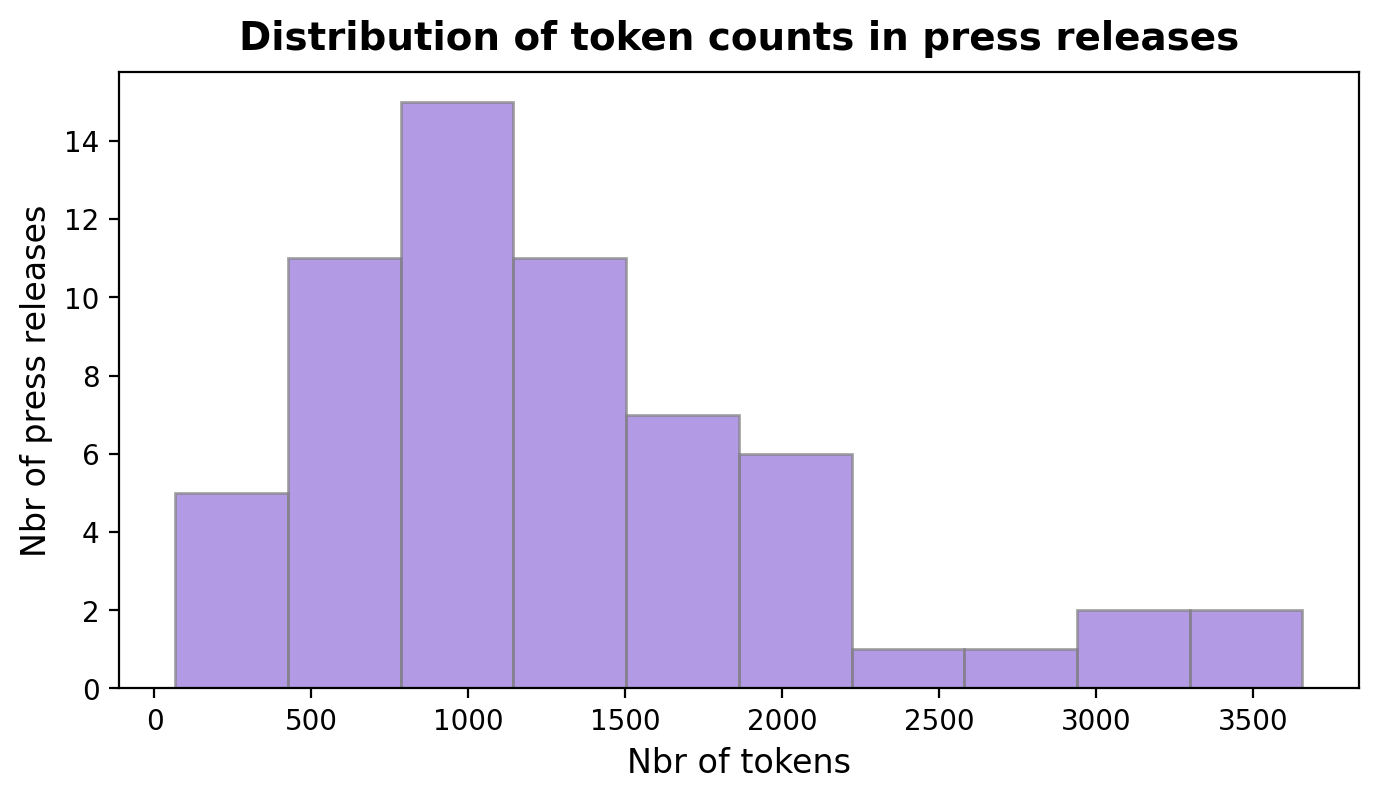

In [143]:
# Plot the number of tokens per press release

# Barplot and font specifications
barplot_specs = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
label_specs   = {"fontsize": 12}
title_specs   = {"fontsize": 14, "fontweight": "bold", "y": 1.01}

plt.figure(figsize=(8,4))

plt.hist(df['text'].apply(lambda x:len(x.split())), **barplot_specs)
plt.xlabel('Nbr of tokens', **label_specs)
plt.ylabel('Nbr of press releases',**label_specs)
plt.title('Distribution of token counts in press releases',**title_specs)
plt.show()

Below we use the describe method to get descriptive statistics for token counts in press releases.

In [144]:
df['text'].apply(lambda x: len(x.split())).describe()

count      61.000000
mean     1287.098361
std       800.633597
min        66.000000
25%       752.000000
50%      1132.000000
75%      1706.000000
max      3658.000000
Name: text, dtype: float64

The shortest press release has 66 tokens, and the longest has 3’658 tokens. The median number of tokens per press release is 1’132.

### Word frequencies
Now, we would like to know a bit more about what each press release is about. One way to answer this question would be to look at the most frequent tokens in each press release. Tokens that are mentioned several times in a text may reveal some information about the content of each press release.

Let’s start with at an example of a press release from the data.

In [145]:
sample = df['text'][0]
print(sample)

Bern, 28.02.2020 - An extraordinary meeting of the Federal Council was held today, 28 February. In view of the current situation and the spread of the coronavirus, the Federal Council has categorised the situation in Switzerland as ‘special’ in terms of the Epidemics Act. Large-scale events involving more than 1000 people are to be banned. The ban comes into immediate effect and will apply at least until 15 March. The Federal Council's top priority is to protect the population. It is responding to the latest developments in the coronavirus epidemic and has categorised the situation in Switzerland as ‘special' in terms of the Epidemics Act. This enables the Federal Council, in consultation with the cantons, to order measures that are normally the responsibility of the cantons.The Federal Council is banning public and private events in Switzerland at which more than 1000 people would gather. This ban on events comes into immediate effect and will apply at least until 15 March. The canton

We can start by splitting the document on whitespace and then count the instances of each token to find the most frequent one. However, there are some issues with this approach. Let’s see why.

In [146]:
# Split text on whitespace
print(sample.split()[0:150])

# Note: we show only the first 150 tokens

['Bern,', '28.02.2020', '-', 'An', 'extraordinary', 'meeting', 'of', 'the', 'Federal', 'Council', 'was', 'held', 'today,', '28', 'February.', 'In', 'view', 'of', 'the', 'current', 'situation', 'and', 'the', 'spread', 'of', 'the', 'coronavirus,', 'the', 'Federal', 'Council', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', '‘special’', 'in', 'terms', 'of', 'the', 'Epidemics', 'Act.', 'Large-scale', 'events', 'involving', 'more', 'than', '1000', 'people', 'are', 'to', 'be', 'banned.', 'The', 'ban', 'comes', 'into', 'immediate', 'effect', 'and', 'will', 'apply', 'at', 'least', 'until', '15', 'March.', 'The', 'Federal', "Council's", 'top', 'priority', 'is', 'to', 'protect', 'the', 'population.', 'It', 'is', 'responding', 'to', 'the', 'latest', 'developments', 'in', 'the', 'coronavirus', 'epidemic', 'and', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', "‘special'", 'in', 'terms', 'of', 'the', 'Epidemics', 'Act.', 'This', 'enables', 'the', 'Federal',

This approach doesn’t separate punctuation from adjacent words. For example, in the following tokens: February., March., Act., etc., the period . wasn’t separated from the preceding token. This is not great as it means February. and February won’t be counted together.

Below, we replace characters such as commas, periods, parentheses and single hyphens (-) with whitespace, using regular expressions.

In [147]:
import re

# Replace punctuation marks (,.()) with whitespace
clean_sample = re.sub(r"[,.()]", # regex pattern
                      " ",       # replace with whitespace
                      sample     # string
                     )

# Replace single hyphens with whitespace
clean_sample = re.sub(r"\s-\s",      # regex pattern
                      " ",           # replace with whitespace
                      clean_sample   # string
                     )

# Print clean_sample
print(clean_sample)

Bern  28 02 2020 An extraordinary meeting of the Federal Council was held today  28 February  In view of the current situation and the spread of the coronavirus  the Federal Council has categorised the situation in Switzerland as ‘special’ in terms of the Epidemics Act  Large-scale events involving more than 1000 people are to be banned  The ban comes into immediate effect and will apply at least until 15 March  The Federal Council's top priority is to protect the population  It is responding to the latest developments in the coronavirus epidemic and has categorised the situation in Switzerland as ‘special' in terms of the Epidemics Act  This enables the Federal Council  in consultation with the cantons  to order measures that are normally the responsibility of the cantons The Federal Council is banning public and private events in Switzerland at which more than 1000 people would gather  This ban on events comes into immediate effect and will apply at least until 15 March  The cantons 

Now we can go ahead and split the clean_sample on whitespace.

In [148]:
# Split clean_sample on whitespace
print(clean_sample.split()[0:150])

# Note: we show only the first 150 tokens

['Bern', '28', '02', '2020', 'An', 'extraordinary', 'meeting', 'of', 'the', 'Federal', 'Council', 'was', 'held', 'today', '28', 'February', 'In', 'view', 'of', 'the', 'current', 'situation', 'and', 'the', 'spread', 'of', 'the', 'coronavirus', 'the', 'Federal', 'Council', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', '‘special’', 'in', 'terms', 'of', 'the', 'Epidemics', 'Act', 'Large-scale', 'events', 'involving', 'more', 'than', '1000', 'people', 'are', 'to', 'be', 'banned', 'The', 'ban', 'comes', 'into', 'immediate', 'effect', 'and', 'will', 'apply', 'at', 'least', 'until', '15', 'March', 'The', 'Federal', "Council's", 'top', 'priority', 'is', 'to', 'protect', 'the', 'population', 'It', 'is', 'responding', 'to', 'the', 'latest', 'developments', 'in', 'the', 'coronavirus', 'epidemic', 'and', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', "‘special'", 'in', 'terms', 'of', 'the', 'Epidemics', 'Act', 'This', 'enables', 'the', 'Federal', 'Counci

We were able to separate punctuation marks from adjacent words and remove single hyphens. Let’s go ahead and find the most common tokens in our text sample. We will use the Counter object from the collections module.

In [149]:
from collections import Counter

# Print top-25 most frequent tokens in clean_sample
Counter(clean_sample.split()).most_common(25)

[('the', 39),
 ('in', 20),
 ('to', 15),
 ('of', 12),
 ('Switzerland', 11),
 ('Federal', 10),
 ('and', 10),
 ('is', 10),
 ('The', 9),
 ('Council', 8),
 ('public', 8),
 ('events', 7),
 ('people', 7),
 ('at', 7),
 ('cantons', 6),
 ('or', 6),
 ('than', 5),
 ('1000', 5),
 ('are', 5),
 ('ban', 5),
 ('will', 5),
 ('situation', 4),
 ('It', 4),
 ('This', 4),
 ('with', 4)]

Here are a few observations:

The words “The” and “the” were counted separately. However, there is no advantage in tracking “The” and “the” separately.
Words such as: “the”, “in”, “to”, etc. are among the most common tokens. These words don’t help us understand what a press release is about.
We will address both issues below.

### Case folding
It is common to convert documents to lowercase; instead of including all capitalized and lowercase versions of a word in the text (e.g., “The”, and “The”), we keep only words in lowercase (“the”).

In [150]:
# Case folding
processed_sample = clean_sample.lower()

print("Convert to lowercase: \n\n{}\n".format(processed_sample))

Convert to lowercase: 

bern  28 02 2020 an extraordinary meeting of the federal council was held today  28 february  in view of the current situation and the spread of the coronavirus  the federal council has categorised the situation in switzerland as ‘special’ in terms of the epidemics act  large-scale events involving more than 1000 people are to be banned  the ban comes into immediate effect and will apply at least until 15 march  the federal council's top priority is to protect the population  it is responding to the latest developments in the coronavirus epidemic and has categorised the situation in switzerland as ‘special' in terms of the epidemics act  this enables the federal council  in consultation with the cantons  to order measures that are normally the responsibility of the cantons the federal council is banning public and private events in switzerland at which more than 1000 people would gather  this ban on events comes into immediate effect and will apply at least unti

### Stop words
Words such as “the”, “in”, “to”, are commonly referred to as stop words and are necessary for a sentence to make sense from a grammatical point of view. However, they are very “frequent” and usually “uninformative”. Hence, in most cases, it is useful to remove them from text.

Many libraries for working with text provide pre-compiled lists of stop words for several languages. We will use the list provided by the NLTK library.

In [152]:
# Load English stopwords from nltk

import nltk

nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

stopwords_english = stopwords.words("english")

# Print stopwords

print("{} stopwords in NLTK's list.\n".format(len(stopwords_english)))
print(stopwords_english)

179 stopwords in NLTK's list.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',

There are 179 words in NLTK’s stop words list.

We can remove stop words from our document using list comprehensions.